<a href="https://colab.research.google.com/github/K1EH/GCU_MachineLearning/blob/main/4_2_%ED%99%95%EB%A5%A0%EC%A0%81_%EA%B2%BD%EC%82%AC_%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 확률적 경사 하강법

점진적 학습 : 앞서 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련하는 방식

대표적인 점진적 학습 알고리즘은 **확률적 경사 하강법[Stochastic Gradient]**임

**확률적 경사 하강법(Stochastic Gradient Descent, SGD):**

확률적 경사 하강법은 매 반복마다 하나의 훈련 데이터 포인트를 사용하여 모델을 업데이트합니다.
랜덤성을 포함하므로 에포크를 반복할 때마다 다른 데이터 포인트를 선택합니다.
빠른 업데이트로 빠른 수렴을 달성할 수 있지만, 노이즈가 많을 수 있습니다.

**미니배치 경사 하강법(Mini-Batch Gradient Descent):**

미니배치 경사 하강법은 데이터를 작은 미니배치로 나누어 각 미니배치에 대해 모델을 업데이트합니다.
일반적으로 미니배치 크기는 2에서 수백 사이의 값으로 설정됩니다.
미니배치 크기를 통해 일부 데이터의 패턴을 캡처하면서도 빠른 학습이 가능합니다.

**배치 경사 하강법(Batch Gradient Descent):**

배치 경사 하강법은 전체 데이터셋을 사용하여 모델을 업데이트합니다.
모든 데이터를 고려하므로 정확한 그레이디언트를 계산할 수 있지만, 계산량이 많고 메모리를 많이 요구합니다.
수렴이 느릴 수 있지만, 안정적인 업데이트를 제공합니다.

8 00.
08<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/4-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## SGDClassifier

In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()
fish_target

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

Species 열은 타겟 데이터, 나머지 5개 열은 입력데이터로 사용

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

데이터를 훈련 세트와 테스트 세트로 나눔

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

훈련 세트와 테스트 세트의 특성을 표준화 전처리 함

꼭 훈련세트에서 학습한 통계값으로, 테스트 세트도 변환해야함

```
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
```

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(



```
max_iter=10
```
위 코드에서, 수행할 에포크 횟수를 10으로 지정하여, 전체 훈련 세트를 10회 반복함



In [ ]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85



```
sc.partial_fit()
```
메서드를 사용해, 1 에포크씩 이어서 훈련할 수 있음

-> 점진적 학습


## 에포크와 과대/과소적합

적은 에포크 횟수 동안에 훈련한 모델 : 과소적합된 모델일 가능성이 높음

많은 에포크 횟수 동안에 훈련한 모델 : 과대적합된 모델일 가능성이 높음

에포크가 진행됨에 따라, 정확도에 대한 훈련 세트 점수는 꾸준히 증가하지만, 테스트 세트 점수는 어느 순간 감소하기 시작함

-> 이 지점이 모델이 과대적합되기 시작하는 곳

과대적합이 시작하기 전에 훈련을 멈추는 것을 **조기종료[early stopping]**이라고 함

In [ ]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [ ]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

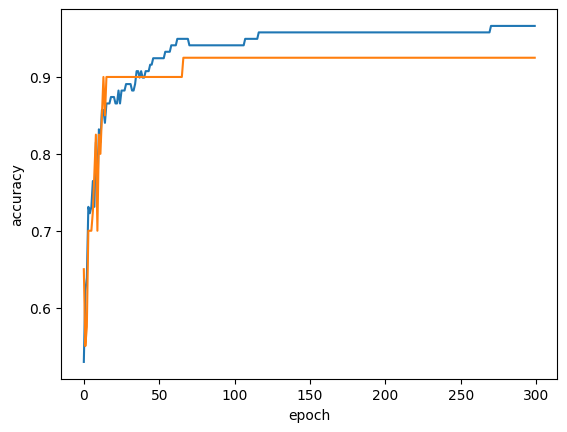

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

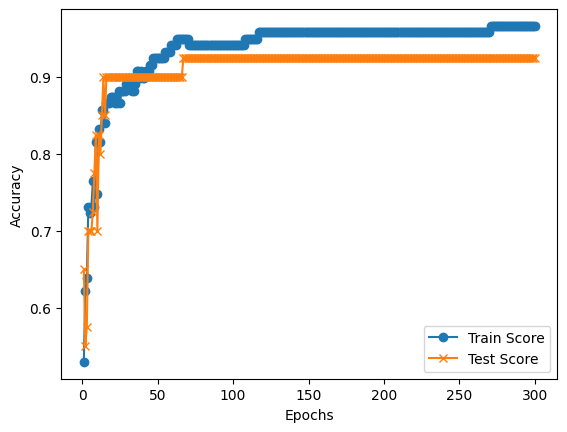

In [ ]:
import matplotlib.pyplot as plt

# train_score와 test_score 리스트가 이미 채워져 있다고 가정합니다.

# 에포크(반복) 횟수
epochs = range(1, len(train_score) + 1)

# 훈련 점수와 테스트 점수를 그래프로 표현
plt.plot(epochs, train_score, label='Train Score', marker='o')
plt.plot(epochs, test_score, label='Test Score', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

300번의 에포크 동안 기록한 훈련 세트와 테스트 세트의 점수를 그래프로 그려보면, 100번째 에포크 이후에 훈련 세트와 테스트 세트의 점수가 조금씩 벌어지는 것으로 보임

-> 이 모델의 경우 백 번째 에포크가 적절한 반복 횟수로 보여짐

In [ ]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면, 더 훈련하지 않고 자동으로 멈춤

tol 매개 변수에서 향상될 최솟값을 지정하는데, 위 코드에서는 tol 매개변수를 None로 지정하여, 자동으로 멈추지 않고 max_iter=100만큼 무조건 반복하도록 하였음

In [ ]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


loss 매개변수의 기본값은 'hinge'임

**힌지 손실[hinge loss]**은 **서포트 벡터 머신[support vector machine]**이라 불리는 또 다른 머신러닝 알고리즘을 위한 손실 함수임